# Importing Libraries

# Question 1:


A firm has been providing services to its customers. The dataset (complaint.csv) contain
following attributes
1. Ticket #: Ticket number assigned to each complaint
2. Customer Complaint: Description of complaint
3. Date: Date of complaint
4. Time: Time of complaint
5. Received Via: Mode of communication of the complaint
6. City: Customer city
7. State: Customer state
8. Zipcode: Customer zip
9. Status: Status of complaint
10. Filing on behalf of someone
Analysis Task
To perform these tasks, you can use any of the different Python libraries such as NumPy,
Pandas, scikit-learn, and matplotlib.
[1] Produce the trend chart about the monthly registered complaints
[2] Generate a tabular output with frequencies of complaints
[3] Find which complaint types are maximum i.e., internet, network issues, etc.
[4] Provide the state wise status of complaint in the form of stacked bar
[5] Report which state has registered maximum and minimum complaint
[6] Which state has the highest and lowest percentage of unresolved complaints

In [176]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Reading CSV File

In [226]:
data=pd.read_csv('complaint.csv')
data.head(5)

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
0,250635,Cable Internet Speeds,22-04-2015,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No
1,223441,Payment disappear - service got disconnected,04-08-2015,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No
2,242732,Speed and Service,18-04-2015,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes
3,277946,Imposed a New Usage Cap of 300GB that punishe...,05-07-2015,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes
4,307175,not working and no service to boot,26-05-2015,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No


# Questin 1.1

In [227]:
data.columns

Index(['Ticket #', 'Customer Complaint', 'Date', 'Date_month_year', 'Time',
       'Received Via', 'City', 'State', 'Zip code', 'Status',
       'Filing on Behalf of Someone'],
      dtype='object')

Cheacking for infinite value

In [228]:
data.isna().sum()

Ticket #                       0
Customer Complaint             0
Date                           0
Date_month_year                0
Time                           0
Received Via                   0
City                           0
State                          0
Zip code                       0
Status                         0
Filing on Behalf of Someone    0
dtype: int64

Breaking Date column into Day, Month And Year Columns

In [229]:
data['Year']=[d.split('-')[-1] for d in data.Date]
data['Month']=[d.split('-')[1] for d in data.Date]
data['Day']=[d.split('-')[0] for d in data.Date]
data.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,Year,Month,Day
0,250635,Cable Internet Speeds,22-04-2015,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,2015,04,22
1,223441,Payment disappear - service got disconnected,04-08-2015,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,2015,08,04
2,242732,Speed and Service,18-04-2015,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,2015,04,18
3,277946,Imposed a New Usage Cap of 300GB that punishe...,05-07-2015,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes,2015,07,05
4,307175,not working and no service to boot,26-05-2015,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No,2015,05,26


In [230]:
print(data.Month.head())

0    04
1    08
2    04
3    07
4    05
Name: Month, dtype: object


Cheacking no of Years and Months 

In [231]:
print('Years -' +str(data.Year.unique()))
print('Months - ' +str(data.Month.unique()))

Years -['2015']
Months - ['04' '08' '07' '05' '12' '06' '01' '11' '02' '09' '03' '10']


There is only one Year so Plotting the complaintsper month

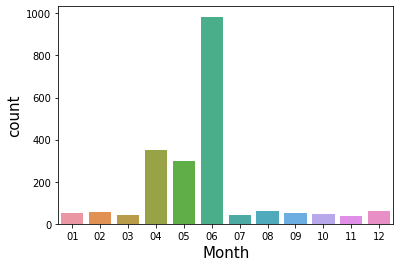

In [232]:
sns.countplot(x="Month", data=data)

# Question 1.2

Grouping Frequencies of complains month wise in tabular form

In [233]:
data.groupby(['Month']).size().reset_index(name="Frequency of compaints")

,Month,Frequency of compaints
0,01,52
1,02,54
2,03,42
3,04,351
4,05,297
5,06,984
6,07,44
7,08,61
8,09,51
9,10,47


# Question 1.3

In [234]:
data['Customer Complaint'].head()

0                                Cable Internet Speeds
1         Payment disappear - service got disconnected
2                                    Speed and Service
3     Imposed a New Usage Cap of 300GB that punishe...
4                   not working and no service to boot
Name: Customer Complaint, dtype: object

Types of complains

In [235]:
len(data['Customer Complaint'].unique())

1783

Finding Frequency of complains

In [236]:
complain=data['Customer Complaint'].value_counts()
complain.head()

 Internet     18
 Data Cap     17
 data cap     12
 Data Caps    11
Data Caps     11
Name: Customer Complaint, dtype: int64

In [237]:
print('Maximum complaint Type is = %s'% complain.idxmax())

Maximum complaint Type is =  Internet


# Question 1.4

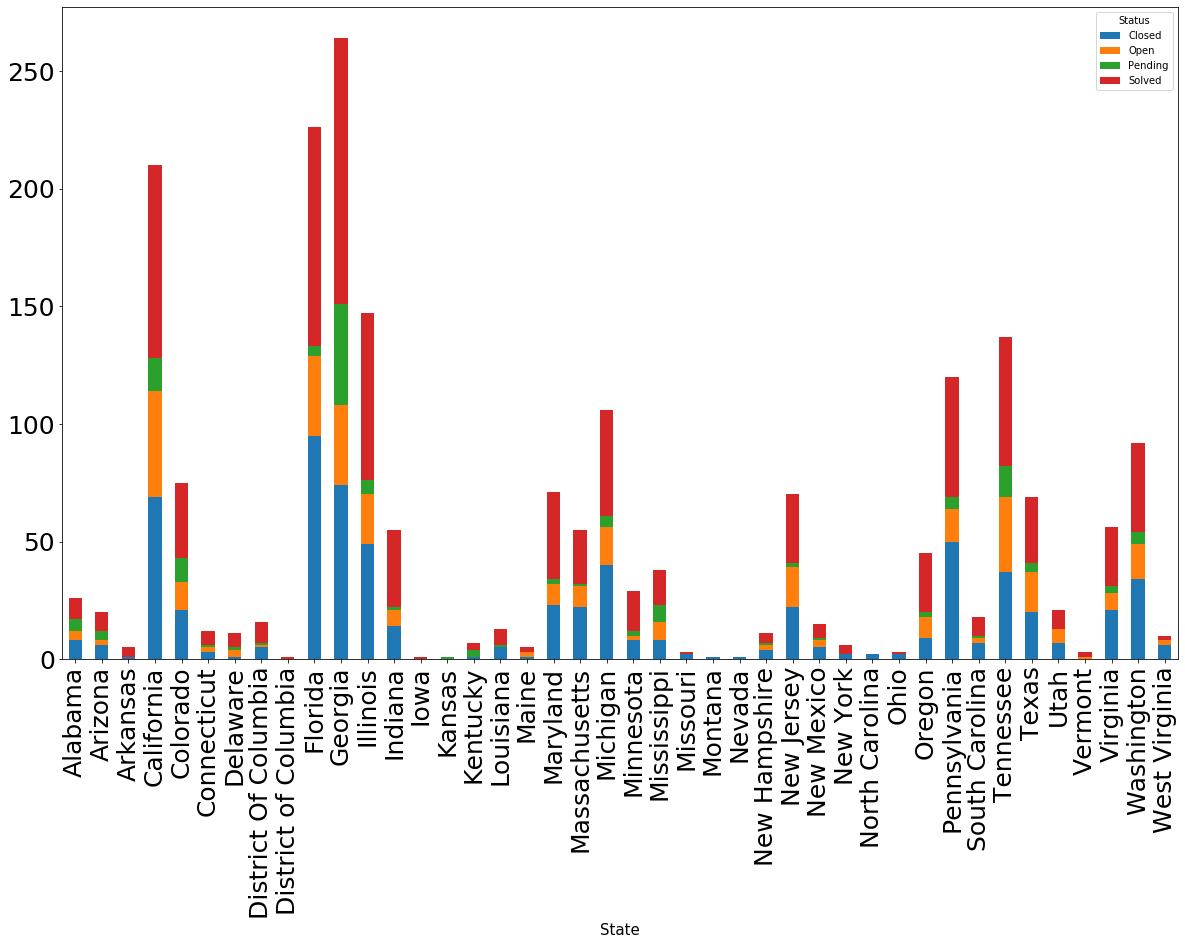

In [238]:
data.groupby(['State', 'Status']).size().unstack().plot(kind='bar', stacked=True, figsize=(20, 12),fontsize=25)

# Question 1.5

In [239]:
state_com=data['State'].value_counts()
state_com.head(-1)

Georgia                 264
Florida                 226
California              210
Illinois                147
Tennessee               137
Pennsylvania            120
Michigan                106
Washington               92
Colorado                 75
Maryland                 71
New Jersey               70
Texas                    69
Virginia                 56
Massachusetts            55
Indiana                  55
Oregon                   45
Mississippi              38
Minnesota                29
Alabama                  26
Utah                     21
Arizona                  20
South Carolina           18
District Of Columbia     16
New Mexico               15
Louisiana                13
Connecticut              12
New Hampshire            11
Delaware                 11
West Virginia            10
Kentucky                  7
New York                  6
Maine                     5
Arkansas                  5
Missouri                  3
Vermont                   3
Ohio                

In [240]:
print('State that has registered maximum no of complaints is = %s\nState that has registered minimum no of complaints is = %s'
      % (state_com.idxmax(), state_com.idxmin()))

State that has registered maximum no of complaints is = Georgia
State that has registered minimum no of complaints is = Kansas


# Question 1.6

In [241]:
State_com_per=data.groupby(['State', 'Status']).size().unstack()
State_com_per=State_com_per.fillna(0)
State_com_per.head()

Status,Closed,Open,Pending,Solved
State,,,,
Alabama,8.0,4.0,5.0,9.0
Arizona,6.0,2.0,4.0,8.0
Arkansas,1.0,0.0,0.0,4.0
California,69.0,45.0,14.0,82.0
Colorado,21.0,12.0,10.0,32.0


Total unresolved complaints are open and pending cases


Toatal cases are sum of all cases for pericular state


so percentage=((open+pending)/total)*100

In [242]:
State_com_per['Precentage of unresolved complaints']=((State_com_per['Open']+State_com_per['Pending'])/State_com_per.sum(axis=1))*100

In [243]:
State_com_per.head()

Status,Closed,Open,Pending,Solved,Precentage of unresolved complaints
State,,,,,
Alabama,8.0,4.0,5.0,9.0,34.615385
Arizona,6.0,2.0,4.0,8.0,30.000000
Arkansas,1.0,0.0,0.0,4.0,0.000000
California,69.0,45.0,14.0,82.0,28.095238
Colorado,21.0,12.0,10.0,32.0,29.333333


In [244]:
print('State that has the highest percentage of unresolved complaints is = %s\nState that has the highest percentage of unresolved complaints is = %s'
      % (State_com_per['Precentage of unresolved complaints'].idxmax(), State_com_per['Precentage of unresolved complaints'].idxmin()))

State that has the highest percentage of unresolved complaints is = Kansas
State that has the highest percentage of unresolved complaints is = Arkansas


###############################################################################

###############################################################################

# #Question 2

Mart would like to predict the sales and demand accurately. There are certain events and
holidays which impact sales on each day. An ML algorithm will predict demand accurately and
factors like economic conditions including CPI, Unemployment Index, etc. Store runs
promotional events throughout the year (which are the Super Bowl, Labour Day, Thanksgiving,
and Christmas). Part of the assignment is modeling the effects of markdowns on these holiday
weeks in the absence of complete/ideal historical data.
Dataset Description (Name of Dataset:Mart.csv)
This is the historical data that covers sales from 2010-02-05 to 2012-11-01. Within this file you
will find the following fields:
Store - the store number
Date - the week of sales
Weekly_Sales - sales for the given store
Holiday_Flag - whether the week is a special holiday week 1 – Holiday week 0 – Non-holiday
week
Temperature - Temperature on the day of sale
Fuel_Price - Cost of fuel in the region
CPI – Prevailing consumer price index
Unemployment - Prevailing unemployment rate
Holiday Events
Event 1: 12-Feb-10, 11-Feb-11, 10-Feb-12, 8-Feb-13
Event 2: 10-Sep-10, 9-Sep-11, 7-Sep-12, 6-Sep-13
Event 3: 26-Nov-10, 25-Nov-11, 23-Nov-12, 29-Nov-13
Event 4: 31-Dec-10, 30-Dec-11, 28-Dec-12, 27-Dec-13
Basic Statistics tasks
1. Which store has maximum sales
2. Which store has maximum standard deviation i.e., the sales vary a lot. Also, find out the
coefficient of mean to standard deviation
3. Some holidays have a negative impact on sales. Find out holidays which have higher
sales than the mean sales in non-holiday season for all stores together
4. Provide a monthly and 6 month view of sales in units and give insights
Statistical Model
For store 2 develop Linear Regression model– Utilize variables like date and restructure dates as
1 for 5 Feb 2010 (starting from the earliest date in order). Hypothesize if CPI, unemployment,
and fuel price have any impact on sales.

# Importing Libraries

In [245]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import date
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
%matplotlib inline

#  Reading CSV File

In [246]:
data=pd.read_csv('Mart.csv')
data.head(5)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


Cheaking for NaN values

In [247]:
data.isna().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [248]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


# Question 2.1

In [249]:
Max_sale =data.groupby('Store')['Weekly_Sales'].sum()
print("Store which has Max sale - %s\nSum of Total Sales - %s"%(Max_sale.idxmax(),Max_sale.max()))

Store which has Max sale - 20
Sum of Total Sales - 301397792.46000004


# Question 2.2

In [250]:
Std_dev = data.groupby('Store').agg({'Weekly_Sales':'std'})
Std_dev.head()

,Weekly_Sales
Store,
1,155980.767761
2,237683.694682
3,46319.631557
4,266201.442297
5,37737.965745


In [251]:
print("Store has Max Standard Deviation is - %s\nMax Standard Deviation is - %s"%(Std_dev['Weekly_Sales'].idxmax(),Std_dev['Weekly_Sales'].max()))

Store has Max Standard Deviation is - 14
Max Standard Deviation is - 317569.9494755081


In [252]:
Std_dev_mean = data.groupby('Store').agg({'Weekly_Sales':['mean','std']})
Std_dev_mean.head()

Weekly_Sales               
               mean            std
Store                             
1      1.555264e+06  155980.767761
2      1.925751e+06  237683.694682
3      4.027044e+05   46319.631557
4      2.094713e+06  266201.442297
5      3.180118e+05   37737.965745

In [253]:
Std_dev_mean['Coff of mean to std']=(Std_dev_mean['Weekly_Sales']['mean']/Std_dev_mean['Weekly_Sales']['std'])
Std_dev_mean.head()

Weekly_Sales                Coff of mean to std
               mean            std                    
Store                                                 
1      1.555264e+06  155980.767761            9.970873
2      1.925751e+06  237683.694682            8.102160
3      4.027044e+05   46319.631557            8.694034
4      2.094713e+06  266201.442297            7.868902
5      3.180118e+05   37737.965745            8.426840

In [254]:
print("Store has Max coff mean to Standard Deviation is - %s\ncoff mean to Standard Deviation is - %s"%(Std_dev_mean['Coff of mean to std'].idxmax(),Std_dev_mean['Coff of mean to std'].max()))

Store has Max coff mean to Standard Deviation is - 37
coff mean to Standard Deviation is - 23.761932646021123


# Question 2.3

In [255]:
holisale = data[data['Holiday_Flag'] ==1]
holisale.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
31,1,10-09-2010,1507460.69,1,78.69,2.565,211.495190,7.787
42,1,26-11-2010,1955624.11,1,64.52,2.735,211.748433,7.838
47,1,31-12-2010,1367320.01,1,48.43,2.943,211.404932,7.838
53,1,11-02-2011,1649614.93,1,36.39,3.022,212.936705,7.742


In [256]:
noholisale = data[data['Holiday_Flag'] ==0]
noholisale.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
5,1,12-03-2010,1439541.59,0,57.79,2.667,211.380643,8.106


In [257]:
sum(noholisale['Weekly_Sales'])

6231919435.550006

In [258]:
len(noholisale['Weekly_Sales'])

5985

In [259]:
mean_nonholisale=sum(noholisale['Weekly_Sales'])/len(noholisale['Weekly_Sales'])
print(mean_nonholisale)

1041256.3802088564


In [260]:
more_sale=holisale.loc[holisale['Weekly_Sales']>mean_nonholisale,['Date','Weekly_Sales']]
len(more_sale)

220

In [261]:
more_sale.head(-1)

,Date,Weekly_Sales
1,12-02-2010,1641957.44
31,10-09-2010,1507460.69
42,26-11-2010,1955624.11
47,31-12-2010,1367320.01
53,11-02-2011,1649614.93
...,...,...
5814,25-11-2011,1906713.35
5819,30-12-2011,1264014.16
5825,10-02-2012,1238844.56
5855,07-09-2012,1392143.82


# Question 2.4

In [262]:
data["Date"] = pd.to_datetime(data['Date'])
Monthly=data.set_index('Date').resample('1M')["Weekly_Sales"].sum()
Monthly.head()

Date
2010-01-31    4.223988e+07
2010-02-28    1.915869e+08
2010-03-31    1.862262e+08
2010-04-30    1.838118e+08
2010-05-31    2.806119e+08
Freq: M, Name: Weekly_Sales, dtype: float64

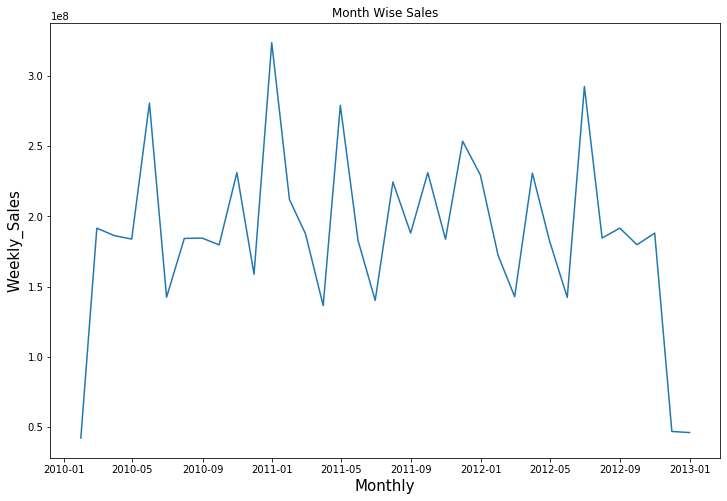

In [263]:
plt.figure(figsize=(12,8))
plt.rc('axes', labelsize=15)
plt.plot(Monthly)
plt.title('Month Wise Sales')
plt.xlabel('Monthly')
plt.ylabel('Weekly_Sales')
plt.show()

We can see up from the Graph the highest sales is recorded in between jan-2011 to march-2011.

In [264]:
six_month=data.set_index('Date').resample('6M')["Weekly_Sales"].sum()
six_month.head(-1)

Date
2010-01-31    4.223988e+07
2010-07-31    1.168939e+09
2011-01-31    1.289673e+09
2011-07-31    1.150555e+09
2012-01-31    1.257900e+09
2012-07-31    1.175370e+09
Freq: 6M, Name: Weekly_Sales, dtype: float64

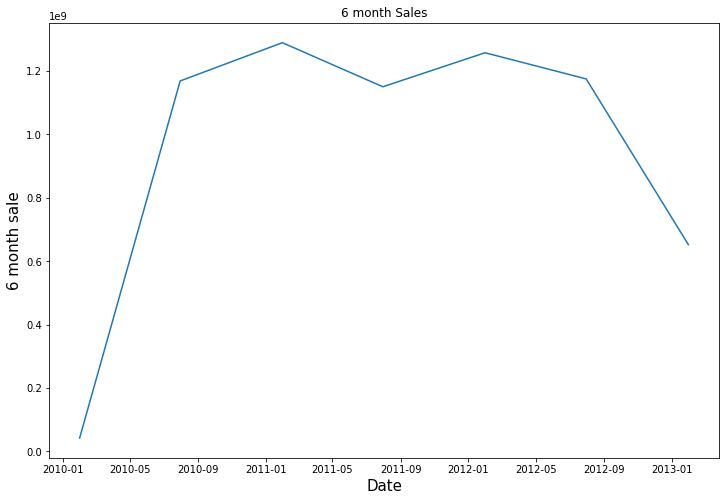

In [265]:
plt.figure(figsize=(12,8))
plt.rc('axes', labelsize=15)
plt.plot(six_month)
plt.title('6 month Sales')
plt.xlabel('Date')
plt.ylabel('6 month sale')
plt.show()

We can see up from the Graph the highest sales is recorded in between first 6 month of 2011

In [266]:
Month_=['jan','feb','mar','apr','may','june','jul',
                'Aug','Sep','Oct','Nov','Dec']

In [267]:
Monthly_sale=np.array(Monthly)
Monthly_sale

array([4.22398759e+07, 1.91586881e+08, 1.86226221e+08, 1.83811789e+08,
       2.80611884e+08, 1.42436082e+08, 1.84266356e+08, 1.84538086e+08,
       1.79704061e+08, 2.31120142e+08, 1.58773134e+08, 3.23571609e+08,
       2.11965690e+08, 1.87609204e+08, 1.36520519e+08, 2.78969312e+08,
       1.82801667e+08, 1.40193615e+08, 2.24461092e+08, 1.88081027e+08,
       2.31032263e+08, 1.83719329e+08, 2.53470323e+08, 2.29375968e+08,
       1.72220699e+08, 1.42829598e+08, 2.30739669e+08, 1.82542788e+08,
       1.42283042e+08, 2.92388267e+08, 1.84586490e+08, 1.91612587e+08,
       1.79795939e+08, 1.88079386e+08, 4.69258790e+07, 4.61285142e+07])

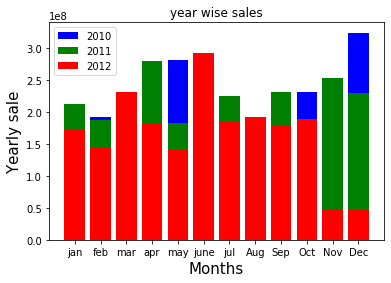

In [268]:
fig, ax = plt.subplots()
ax.bar(Month_,Monthly_sale[0:12],label='2010',color = 'b')
ax.bar(Month_,Monthly_sale[12:24],label='2011',color = 'g')
ax.bar(Month_,Monthly_sale[24:36],label='2012',color = 'r')
ax.set_ylabel('Yearly sale')
ax.set_xlabel('Months')
ax.set_title('year wise sales')
ax.legend()

# Statistical Model

Making saperate dataset df for store 2

In [269]:
df=data[data['Store'] ==2]
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
143,2,2010-05-02,2136989.46,0,40.19,2.572,210.752605,8.324
144,2,2010-12-02,2137809.50,1,38.49,2.548,210.897994,8.324
145,2,2010-02-19,2124451.54,0,39.69,2.514,210.945160,8.324
146,2,2010-02-26,1865097.27,0,46.10,2.561,210.975957,8.324
147,2,2010-05-03,1991013.13,0,47.17,2.625,211.006754,8.324


storing all features in independen variablel

In [270]:
feature = df[['Date','Holiday_Flag','Temperature','CPI','Unemployment','Fuel_Price']]
d_ind = df['Date']
d_ind.index -=142
feature.Date = d_ind.index
feature.head(-1)

D:\program\Anaconda\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,Date,Holiday_Flag,Temperature,CPI,Unemployment,Fuel_Price
143,1,0,40.19,210.752605,8.324,2.572
144,2,1,38.49,210.897994,8.324,2.548
145,3,0,39.69,210.945160,8.324,2.514
146,4,0,46.10,210.975957,8.324,2.561
147,5,0,47.17,211.006754,8.324,2.625
...,...,...,...,...,...,...
280,138,0,71.09,222.416936,6.565,3.721
281,139,0,79.45,222.616433,6.565,3.666
282,140,0,70.27,222.815930,6.170,3.617
283,141,0,60.97,223.015426,6.170,3.601


Weekly sales in dependent variavle

In [271]:
target= df['Weekly_Sales']
target.head()

143    2136989.46
144    2137809.50
145    2124451.54
146    1865097.27
147    1991013.13
Name: Weekly_Sales, dtype: float64

Training the modelin linear Regression

In [272]:
x_train,x_test,y_train,y_test = train_test_split(feature,target,random_state=1)

In [273]:
Lr = LinearRegression()
Lr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

The Recursive Feature Elimination (RFE) method works by recursively removing attributes and building a model on those attributes that remain. It uses accuracy metric to rank the feature according to their importance.
It then gives the ranking of all the variables, 1 being most important. It also gives its support, True being relevant feature and False being irrelevant feature.

Here we took LinearRegression model with 6 features and RFE gave feature ranking.

Here we want to fig the best feature the getting the ranking of fratures

In [274]:
rfe = RFE(Lr, 1)
cols = list(feature.columns)

X_rfe = rfe.fit_transform(feature,target)

Lr.fit(X_rfe,target)

print(rfe.support_)
print('Ranking of the features for their importance--')
print(rfe.ranking_)
print(feature.columns)
temp = pd.Series(rfe.support_,index = cols)
selected_features_rfe = temp[temp==True].index
print('Best feature-')
print(selected_features_rfe)

[False  True False False False False]
Ranking of the features for their importance--
[6 1 5 4 3 2]
Index(['Date', 'Holiday_Flag', 'Temperature', 'CPI', 'Unemployment',
       'Fuel_Price'],
      dtype='object')
Best feature-
Index(['Holiday_Flag'], dtype='object')


It is shown from the raking of the features that temperature,cpi has very less effect on sales 

Also Unemloyenment and fuel affect the sales with holiday